Import needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

Load User data

In [2]:
userCols = ['userId', 'age', 'sex', 'occupation', 'zipCode']
users = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.user', sep = '|', names=userCols)

In [3]:
users.head()

,userId,age,sex,occupation,zipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


Load Rating Data

In [4]:
dataCols = ['userId', 'itemId', 'rating', 'timestamp']
data = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep = '\t', names=dataCols)

In [5]:
data.head()

,userId,itemId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Load Movie Item Data

In [6]:
itemsCols = ['movieId', 'movieTitle' ,'releaseDate','videoReleaseDate', 'imdbUrl', 'unknown', 'Action', 'Adventure',
            'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
            'filmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western']
items = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', names=itemsCols, encoding='latin-1')

In [7]:
rCols = ['userId', 'movieId', 'rating', 'unixTimestamp']

ratingsBase = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/ua.base',
                          sep='\t', names=rCols, encoding='latin-1')

ratingsTest = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/ua.test',
                          sep='\t', names=rCols, encoding='latin-1')


In [8]:
frame = [ratingsBase, ratingsTest]
df = pd.concat(frame, join = 'outer')

In [9]:
df_merged = df.join(items.set_index('movieId'), on='movieId')

In [10]:
attributes = ['userId', 'movieId', 'rating', 'movieTitle', 'releaseDate']
df_clean = df_merged[attributes]
df_clean.rating.astype('float')
df_clean.head()

,userId,movieId,rating,movieTitle,releaseDate
0,1,1,5,Toy Story (1995),01-Jan-1995
1,1,2,3,GoldenEye (1995),01-Jan-1995
2,1,3,4,Four Rooms (1995),01-Jan-1995
3,1,4,3,Get Shorty (1995),01-Jan-1995
4,1,5,3,Copycat (1995),01-Jan-1995


In [11]:
#calculate mean rating of all movies
df_clean.groupby('movieTitle')['rating'].mean().sort_values(ascending=False).head(10)

movieTitle
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

In [12]:
#aggregate mean and count rating of all movies
df_clean.groupby('movieTitle')['rating'].agg(['mean', 'count']).sort_values('count',ascending=False).head(10)

,mean,count
movieTitle,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [13]:
#creating dataframe with 'rating' count values
ratings = pd.DataFrame(df_clean.groupby('movieTitle').rating.agg(['mean', 'count']).sort_values('count',ascending=False))
ratings.head(10)

,mean,count
movieTitle,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [14]:
#selecting movies with mean rating greater than 4
ratings[ratings['mean'] >= 4].head()

,mean,count
movieTitle,,
Star Wars (1977),4.358491,583
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Raiders of the Lost Ark (1981),4.252381,420
"Godfather, The (1972)",4.283293,413


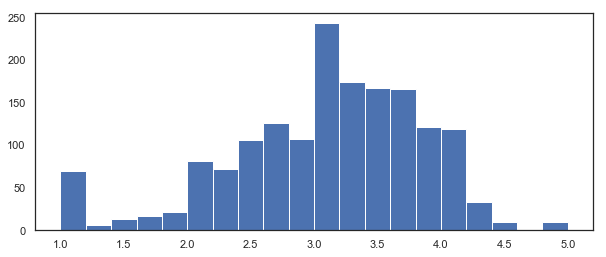

In [15]:
#Visualization
sns.set_style('white')
plt.figure(figsize=(10,4))
ratings['mean'].hist(bins=20, grid = False)

In [16]:
#sorting values according to the count column
moviemat = df_clean.pivot_table(index = 'userId',columns = 'movieTitle', values = 'rating')
moviemat.head(10)

movieTitle,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
starwars_user_ratings = moviemat['Star Wars (1977)']
godfather_user_ratings = moviemat['Godfather, The (1972)']

In [18]:
starwars_user_ratings.head()

userId
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [19]:
#analysing correlation with similar movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_godfather = moviemat.corrwith(godfather_user_ratings)

C:\Users\Shadow\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Shadow\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


creating dataframe of movies correlation with godfather

In [20]:
corr_godfather = pd.DataFrame(similar_to_godfather, columns=['correlation'])
corr_godfather.dropna(inplace=True)
corr_godfather.head(10)

,correlation
movieTitle,
'Til There Was You (1997),0.612372
1-900 (1994),-0.471405
101 Dalmatians (1996),0.084183
12 Angry Men (1957),0.034258
187 (1997),0.467335
2 Days in the Valley (1996),0.229871
"20,000 Leagues Under the Sea (1954)",0.095229
2001: A Space Odyssey (1968),0.305717
"39 Steps, The (1935)",0.006306


# Top recommendation of movies correlated with godfather

In [21]:
corr_godfather.sort_values('correlation', ascending=False).head(10)
corr_godfather = corr_godfather.join(ratings['count'])
corr_godfather.head()
corr_godfather[corr_godfather['count']>100].sort_values('correlation', ascending=False).head(10)

,correlation,count
movieTitle,,
"Godfather, The (1972)",1.000000,413
"Godfather: Part II, The (1974)",0.683862,209
GoodFellas (1990),0.421477,226
"People vs. Larry Flynt, The (1996)",0.393439,215
Bonnie and Clyde (1967),0.386226,122
Chinatown (1974),0.376133,147
Apocalypse Now (1979),0.374378,221
Some Like It Hot (1959),0.366085,128
Dead Man Walking (1995),0.360525,299


--'count' represent the total number of ratings